In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [2]:
import requests
r = requests.get('http://localhost:5000/health')
print(r.json())


C:\Users\Admin\anaconda3\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.5.0) or chardet (4.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(


{'model_loaded': True, 'status': 'healthy'}


In [3]:
import requests
import json

# 예측 요청
test_data = {
    "temperature": -5.2,
    "ground_temp": 8.3,
    "precipitation": 0.0,
    "wind_speed": 3.5,
    "humidity": 65.0,
    "pressure": 1013.25,
    "sunshine": 5.5
}

response = requests.post(
    'http://localhost:5000/api/predict',
    json=test_data
)

print("예측 결과:")
print(json.dumps(response.json(), indent=2, ensure_ascii=False))

예측 결과:
{
  "prediction": 477933.06,
  "status": "success",
  "unit": "kWh"
}


In [4]:
import requests
import json

scenarios = [
    {
        "name": "한여름 (무더운 날)",
        "data": {
            "temperature": 25.5,
            "ground_temp": 28.0,
            "precipitation": 0.0,
            "wind_speed": 2.5,
            "humidity": 75.0,
            "pressure": 1008.0,
            "sunshine": 12.5
        }
    },
    {
        "name": "한겨울 (매우 추운 날)",
        "data": {
            "temperature": -15.0,
            "ground_temp": -5.0,
            "precipitation": 0.0,
            "wind_speed": 5.5,
            "humidity": 45.0,
            "pressure": 1025.0,
            "sunshine": 8.0
        }
    },
    {
        "name": "봄 (쾌적한 날)",
        "data": {
            "temperature": 12.0,
            "ground_temp": 15.0,
            "precipitation": 1.5,
            "wind_speed": 3.0,
            "humidity": 60.0,
            "pressure": 1015.0,
            "sunshine": 10.0
        }
    }
]

print("=" * 60)
print("여러 날씨 시나리오 테스트")
print("=" * 60)

for scenario in scenarios:
    response = requests.post(
        'http://localhost:5000/api/predict',
        json=scenario['data']
    )
    
    result = response.json()
    print(f"\n📊 {scenario['name']}")
    print(f"   예측 전력량: {result['prediction']:,.0f} {result['unit']}")
    print(f"   온도: {scenario['data']['temperature']}°C")
    print(f"   습도: {scenario['data']['humidity']}%")

여러 날씨 시나리오 테스트

📊 한여름 (무더운 날)
   예측 전력량: 518,740 kWh
   온도: 25.5°C
   습도: 75.0%

📊 한겨울 (매우 추운 날)
   예측 전력량: 371,435 kWh
   온도: -15.0°C
   습도: 45.0%

📊 봄 (쾌적한 날)
   예측 전력량: 772,706 kWh
   온도: 12.0°C
   습도: 60.0%


In [5]:
# 잘못된 입력 (습도 > 100%)
invalid_data = {
    "temperature": -5.2,
    "ground_temp": 8.3,
    "precipitation": 0.0,
    "wind_speed": 3.5,
    "humidity": 150.0,  # 잘못된 값!
    "pressure": 1013.25,
    "sunshine": 5.5
}

response = requests.post(
    'http://localhost:5000/api/predict',
    json=invalid_data
)

print("잘못된 입력 테스트:")
print(json.dumps(response.json(), indent=2, ensure_ascii=False))

잘못된 입력 테스트:
{
  "prediction": 477933.06,
  "status": "success",
  "unit": "kWh"
}


C:\Users\Admin\AppData\Local\Temp\ipykernel_3256\379748529.py:35: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_3256\379748529.py:35: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_3256\379748529.py:35: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_3256\379748529.py:35: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_3256\379748529.py:35: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_3256\379748529.py:35: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  plt.tight_layout()
C:\Users\

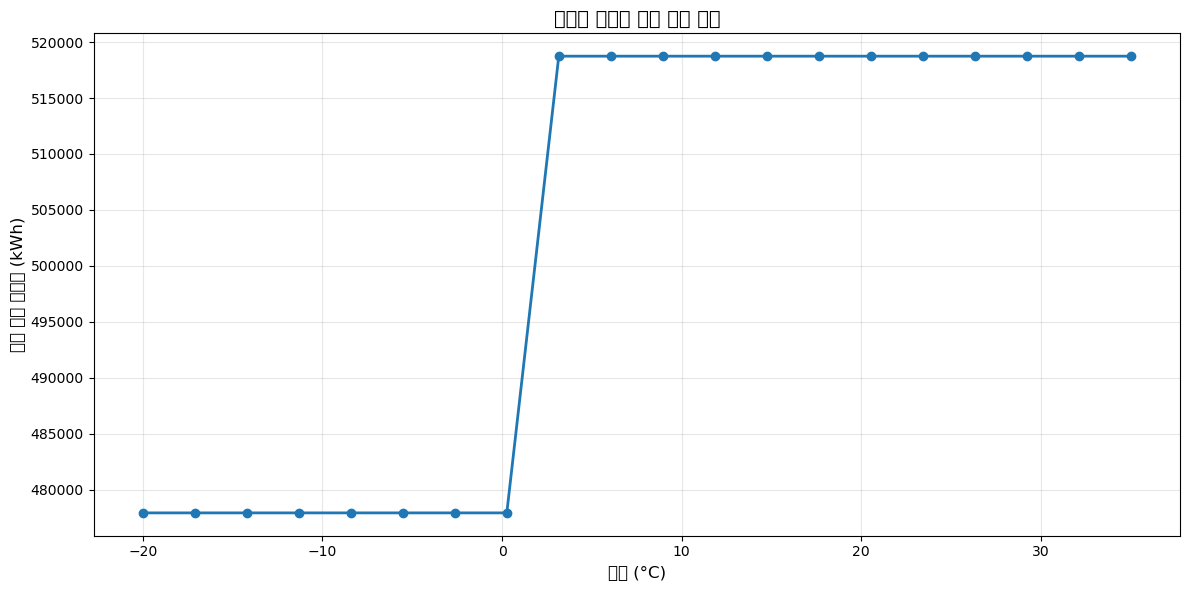


최저 전력량: 477,933 kWh (온도 -20.0°C)
최고 전력량: 518,740 kWh (온도 3.2°C)


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 온도에 따른 전력 수요 변화 시뮬레이션
temperatures = np.linspace(-20, 35, 20)
predictions = []

base_data = {
    "ground_temp": 10.0,
    "precipitation": 0.0,
    "wind_speed": 3.5,
    "humidity": 60.0,
    "pressure": 1013.25,
    "sunshine": 8.0
}

for temp in temperatures:
    test_data = base_data.copy()
    test_data['temperature'] = float(temp)
    
    response = requests.post(
        'http://localhost:5000/api/predict',
        json=test_data
    )
    
    predictions.append(response.json()['prediction'])

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(temperatures, predictions, marker='o', linewidth=2, markersize=6)
plt.xlabel('온도 (°C)', fontsize=12)
plt.ylabel('예측 전력 사용량 (kWh)', fontsize=12)
plt.title('온도별 서울시 전력 수요 예측', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n최저 전력량: {min(predictions):,.0f} kWh (온도 {temperatures[np.argmin(predictions)]:.1f}°C)")
print(f"최고 전력량: {max(predictions):,.0f} kWh (온도 {temperatures[np.argmax(predictions)]:.1f}°C)")

In [7]:
# templates/index.html 생성
html_content = '''<!DOCTYPE html>
<html lang="ko">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>서울시 전력 수요 예측</title>
    <style>
        * {
            margin: 0;
            padding: 0;
            box-sizing: border-box;
        }
        body {
            font-family: 'Segoe UI', Arial, sans-serif;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            min-height: 100vh;
            display: flex;
            justify-content: center;
            align-items: center;
            padding: 20px;
        }
        .container {
            background: white;
            border-radius: 20px;
            padding: 40px;
            box-shadow: 0 20px 60px rgba(0,0,0,0.3);
            max-width: 600px;
            width: 100%;
        }
        h1 {
            color: #333;
            margin-bottom: 30px;
            text-align: center;
        }
        .input-group {
            margin-bottom: 20px;
        }
        label {
            display: block;
            margin-bottom: 5px;
            color: #555;
            font-weight: 500;
        }
        input {
            width: 100%;
            padding: 12px;
            border: 2px solid #e0e0e0;
            border-radius: 8px;
            font-size: 16px;
            transition: border-color 0.3s;
        }
        input:focus {
            outline: none;
            border-color: #667eea;
        }
        button {
            width: 100%;
            padding: 15px;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            border: none;
            border-radius: 8px;
            font-size: 18px;
            font-weight: 600;
            cursor: pointer;
            transition: transform 0.2s;
        }
        button:hover {
            transform: translateY(-2px);
        }
        #result {
            margin-top: 30px;
            padding: 20px;
            background: #f8f9fa;
            border-radius: 10px;
            display: none;
        }
        .prediction {
            font-size: 36px;
            font-weight: bold;
            color: #667eea;
            text-align: center;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>⚡ 서울시 전력 수요 예측</h1>
        
        <div class="input-group">
            <label>최저기온 (°C)</label>
            <input type="number" id="temperature" step="0.1" value="-5.2">
        </div>
        
        <div class="input-group">
            <label>지중온도 (°C)</label>
            <input type="number" id="ground_temp" step="0.1" value="8.3">
        </div>
        
        <div class="input-group">
            <label>소형증발량 (mm)</label>
            <input type="number" id="precipitation" step="0.1" value="0.0">
        </div>
        
        <div class="input-group">
            <label>풍속 (m/s)</label>
            <input type="number" id="wind_speed" step="0.1" value="3.5">
        </div>
        
        <div class="input-group">
            <label>상대습도 (%)</label>
            <input type="number" id="humidity" step="0.1" value="65.0">
        </div>
        
        <div class="input-group">
            <label>현지기압 (hPa)</label>
            <input type="number" id="pressure" step="0.01" value="1013.25">
        </div>
        
        <div class="input-group">
            <label>가조시간 (hr)</label>
            <input type="number" id="sunshine" step="0.1" value="5.5">
        </div>
        
        <button onclick="predict()">예측하기</button>
        
        <div id="result">
            <div class="prediction" id="prediction"></div>
        </div>
    </div>
    
    <script>
        async function predict() {
            const data = {
                temperature: parseFloat(document.getElementById('temperature').value),
                ground_temp: parseFloat(document.getElementById('ground_temp').value),
                precipitation: parseFloat(document.getElementById('precipitation').value),
                wind_speed: parseFloat(document.getElementById('wind_speed').value),
                humidity: parseFloat(document.getElementById('humidity').value),
                pressure: parseFloat(document.getElementById('pressure').value),
                sunshine: parseFloat(document.getElementById('sunshine').value)
            };
            
            try {
                const response = await fetch('/api/predict', {
                    method: 'POST',
                    headers: {'Content-Type': 'application/json'},
                    body: JSON.stringify(data)
                });
                
                const result = await response.json();
                
                if (result.status === 'success') {
                    document.getElementById('prediction').textContent = 
                        result.prediction.toLocaleString() + ' kWh';
                    document.getElementById('result').style.display = 'block';
                } else {
                    alert('오류: ' + result.message);
                }
            } catch (error) {
                alert('서버 오류: ' + error);
            }
        }
    </script>
</body>
</html>'''

import os
os.makedirs('templates', exist_ok=True)
with open('templates/index.html', 'w', encoding='utf-8') as f:
    f.write(html_content)

print("✅ 웹 페이지 생성 완료!")
print("\n브라우저에서 접속: http://localhost:5000")

✅ 웹 페이지 생성 완료!

브라우저에서 접속: http://localhost:5000


In [9]:
import os

# 1. templates 폴더 생성
os.makedirs('templates', exist_ok=True)

# 2. HTML 파일 생성
html_content = """<!DOCTYPE html>
<html lang="ko">
<head>
    <meta charset="UTF-8">
    <title>서울시 전력 예측</title>
    <style>
        body {
            font-family: Arial;
            max-width: 600px;
            margin: 50px auto;
            padding: 20px;
            background: #f5f5f5;
        }
        .container {
            background: white;
            padding: 30px;
            border-radius: 10px;
        }
        h1 {
            text-align: center;
            color: #333;
        }
        .input-group {
            margin: 15px 0;
        }
        label {
            display: block;
            margin-bottom: 5px;
            font-weight: bold;
        }
        input {
            width: 100%;
            padding: 10px;
            border: 1px solid #ddd;
            border-radius: 5px;
        }
        button {
            width: 100%;
            padding: 15px;
            background: #4CAF50;
            color: white;
            border: none;
            border-radius: 5px;
            font-size: 18px;
            cursor: pointer;
            margin-top: 20px;
        }
        button:hover {
            background: #45a049;
        }
        #result {
            margin-top: 20px;
            padding: 20px;
            background: #e3f2fd;
            border-radius: 5px;
            display: none;
            text-align: center;
        }
        .prediction {
            font-size: 32px;
            font-weight: bold;
            color: #1976d2;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>서울시 전력 수요 예측</h1>
        
        <div class="input-group">
            <label>최저기온 (°C)</label>
            <input type="number" id="temperature" step="0.1" value="-5.2">
        </div>
        
        <div class="input-group">
            <label>지중온도 (°C)</label>
            <input type="number" id="ground_temp" step="0.1" value="8.3">
        </div>
        
        <div class="input-group">
            <label>소형증발량 (mm)</label>
            <input type="number" id="precipitation" step="0.1" value="0.0">
        </div>
        
        <div class="input-group">
            <label>풍속 (m/s)</label>
            <input type="number" id="wind_speed" step="0.1" value="3.5">
        </div>
        
        <div class="input-group">
            <label>상대습도 (%)</label>
            <input type="number" id="humidity" step="0.1" value="65.0">
        </div>
        
        <div class="input-group">
            <label>현지기압 (hPa)</label>
            <input type="number" id="pressure" step="0.01" value="1013.25">
        </div>
        
        <div class="input-group">
            <label>가조시간 (hr)</label>
            <input type="number" id="sunshine" step="0.1" value="5.5">
        </div>
        
        <button onclick="predict()">예측하기</button>
        
        <div id="result">
            <div class="prediction" id="prediction"></div>
        </div>
    </div>
    
    <script>
        async function predict() {
            const data = {
                temperature: parseFloat(document.getElementById('temperature').value),
                ground_temp: parseFloat(document.getElementById('ground_temp').value),
                precipitation: parseFloat(document.getElementById('precipitation').value),
                wind_speed: parseFloat(document.getElementById('wind_speed').value),
                humidity: parseFloat(document.getElementById('humidity').value),
                pressure: parseFloat(document.getElementById('pressure').value),
                sunshine: parseFloat(document.getElementById('sunshine').value)
            };
            
            const response = await fetch('/api/predict', {
                method: 'POST',
                headers: {'Content-Type': 'application/json'},
                body: JSON.stringify(data)
            });
            
            const result = await response.json();
            
            if (result.status === 'success') {
                document.getElementById('prediction').textContent = result.prediction.toLocaleString() + ' kWh';
                document.getElementById('result').style.display = 'block';
            } else {
                alert('오류: ' + result.message);
            }
        }
    </script>
</body>
</html>"""

# 파일로 저장
with open('templates/index.html', 'w', encoding='utf-8') as f:
    f.write(html_content)

print("✅ templates/index.html 생성 완료!")

# 3. app.py에 메인 라우트 추가
with open('app.py', 'r', encoding='utf-8') as f:
    app_content = f.read()

# render_template import 추가
if 'render_template' not in app_content:
    app_content = app_content.replace(
        'from flask import Flask, request, jsonify',
        'from flask import Flask, request, jsonify, render_template'
    )

# 메인 라우트 추가
if "@app.route('/')" not in app_content:
    home_route = """
@app.route('/')
def home():
    return render_template('index.html')

"""
    app_content = app_content.replace(
        "@app.route('/health')",
        home_route + "@app.route('/health')"
    )

# 저장
with open('app.py', 'w', encoding='utf-8') as f:
    f.write(app_content)

print("✅ app.py 업데이트 완료!")
print("\n다음 단계:")
print("1. Terminal에서 Ctrl+C 눌러서 서버 중지")
print("2. python app.py 다시 실행")
print("3. 브라우저에서 http://localhost:5000 접속")

✅ templates/index.html 생성 완료!
✅ app.py 업데이트 완료!

다음 단계:
1. Terminal에서 Ctrl+C 눌러서 서버 중지
2. python app.py 다시 실행
3. 브라우저에서 http://localhost:5000 접속


In [10]:
import subprocess
import threading
import time

def run_server():
    subprocess.run(['python', 'app.py'])

server_thread = threading.Thread(target=run_server, daemon=True)
server_thread.start()

time.sleep(3)
print("✅ 서버 실행 중!")
print("브라우저: http://localhost:5000")

✅ 서버 실행 중!
브라우저: http://localhost:5000


In [11]:
# 완전히 새로운 app.py 생성
complete_app = """from flask import Flask, request, jsonify, render_template
import pickle
import pandas as pd
import numpy as np
from datetime import datetime
import os

app = Flask(__name__)

# 모델 로드
MODEL_PATH = 'models/model.pkl'
try:
    with open(MODEL_PATH, 'rb') as f:
        model = pickle.load(f)
    print("모델 로드 성공!")
except FileNotFoundError:
    print("모델 파일을 찾을 수 없습니다.")
    model = None

def preprocess_input(data):
    features = {
        '최저기온(°C)': float(data.get('temperature', 0)),
        '3.0m 지중온도(°C)': float(data.get('ground_temp', 0)),
        '합계 소형증발량(mm)': float(data.get('precipitation', 0)),
        '풍속(100m)': float(data.get('wind_speed', 0)),
        '평균 상대습도(%)': float(data.get('humidity', 0)),
        '평균 현지기압(hPa)': float(data.get('pressure', 1013.25)),
        '가조시간(hr)': float(data.get('sunshine', 0))
    }
    return pd.DataFrame([features])

@app.route('/')
def home():
    try:
        return render_template('index.html')
    except:
        return '''
        <html>
        <body>
            <h1>서울시 전력 예측 API</h1>
            <p>API 테스트:</p>
            <ul>
                <li><a href="/health">/health</a> - 헬스 체크</li>
            </ul>
            <p>templates/index.html 파일을 생성하세요.</p>
        </body>
        </html>
        '''

@app.route('/health')
def health_check():
    return jsonify({
        'status': 'healthy',
        'model_loaded': model is not None,
        'timestamp': datetime.now().isoformat()
    })

@app.route('/api/predict', methods=['POST'])
def predict():
    try:
        if model is None:
            return jsonify({'status': 'error', 'message': '모델이 로드되지 않았습니다.'}), 500
        
        data = request.get_json()
        if not data:
            return jsonify({'status': 'error', 'message': '요청 데이터가 없습니다.'}), 400
        
        features = preprocess_input(data)
        prediction = model.predict(features)
        
        return jsonify({
            'status': 'success',
            'prediction': round(float(prediction[0]), 2),
            'unit': 'kWh',
            'message': '예측이 완료되었습니다.'
        })
    except Exception as e:
        return jsonify({'status': 'error', 'message': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)
"""

# 저장
with open('app.py', 'w', encoding='utf-8') as f:
    f.write(complete_app)

print("✅ app.py 완전히 새로 생성!")
print("\n이제 서버를 재시작하세요.")

✅ app.py 완전히 새로 생성!

이제 서버를 재시작하세요.


In [12]:
import os

# templates 폴더 생성
os.makedirs('templates', exist_ok=True)

html = """<!DOCTYPE html>
<html lang="ko">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>서울시 전력 예측</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            max-width: 600px;
            margin: 50px auto;
            padding: 20px;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        }
        .container {
            background: white;
            padding: 30px;
            border-radius: 15px;
            box-shadow: 0 10px 30px rgba(0,0,0,0.3);
        }
        h1 {
            text-align: center;
            color: #333;
            margin-bottom: 30px;
        }
        .input-group {
            margin: 15px 0;
        }
        label {
            display: block;
            margin-bottom: 5px;
            font-weight: bold;
            color: #555;
        }
        input {
            width: 100%;
            padding: 10px;
            border: 2px solid #ddd;
            border-radius: 5px;
            font-size: 16px;
            box-sizing: border-box;
        }
        input:focus {
            outline: none;
            border-color: #667eea;
        }
        button {
            width: 100%;
            padding: 15px;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            border: none;
            border-radius: 5px;
            font-size: 18px;
            font-weight: bold;
            cursor: pointer;
            margin-top: 20px;
        }
        button:hover {
            transform: translateY(-2px);
            box-shadow: 0 5px 15px rgba(102, 126, 234, 0.4);
        }
        #result {
            margin-top: 30px;
            padding: 20px;
            background: #f0f7ff;
            border-radius: 10px;
            display: none;
        }
        .prediction {
            font-size: 36px;
            font-weight: bold;
            color: #667eea;
            text-align: center;
        }
        .loading {
            text-align: center;
            color: #666;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>⚡ 서울시 전력 수요 예측</h1>
        
        <div class="input-group">
            <label>최저기온 (°C)</label>
            <input type="number" id="temperature" step="0.1" value="-5.2">
        </div>
        
        <div class="input-group">
            <label>지중온도 (°C)</label>
            <input type="number" id="ground_temp" step="0.1" value="8.3">
        </div>
        
        <div class="input-group">
            <label>소형증발량 (mm)</label>
            <input type="number" id="precipitation" step="0.1" value="0.0">
        </div>
        
        <div class="input-group">
            <label>풍속 (m/s)</label>
            <input type="number" id="wind_speed" step="0.1" value="3.5">
        </div>
        
        <div class="input-group">
            <label>상대습도 (%)</label>
            <input type="number" id="humidity" step="0.1" value="65.0">
        </div>
        
        <div class="input-group">
            <label>현지기압 (hPa)</label>
            <input type="number" id="pressure" step="0.01" value="1013.25">
        </div>
        
        <div class="input-group">
            <label>가조시간 (hr)</label>
            <input type="number" id="sunshine" step="0.1" value="5.5">
        </div>
        
        <button onclick="predict()">예측하기</button>
        
        <div id="result">
            <h3 style="text-align: center; margin-bottom: 10px;">예측 결과</h3>
            <div class="prediction" id="prediction"></div>
        </div>
    </div>
    
    <script>
        async function predict() {
            const button = document.querySelector('button');
            const resultDiv = document.getElementById('result');
            const predictionDiv = document.getElementById('prediction');
            
            button.textContent = '예측 중...';
            button.disabled = true;
            
            const data = {
                temperature: parseFloat(document.getElementById('temperature').value),
                ground_temp: parseFloat(document.getElementById('ground_temp').value),
                precipitation: parseFloat(document.getElementById('precipitation').value),
                wind_speed: parseFloat(document.getElementById('wind_speed').value),
                humidity: parseFloat(document.getElementById('humidity').value),
                pressure: parseFloat(document.getElementById('pressure').value),
                sunshine: parseFloat(document.getElementById('sunshine').value)
            };
            
            try {
                const response = await fetch('/api/predict', {
                    method: 'POST',
                    headers: {'Content-Type': 'application/json'},
                    body: JSON.stringify(data)
                });
                
                const result = await response.json();
                
                if (result.status === 'success') {
                    predictionDiv.textContent = result.prediction.toLocaleString() + ' kWh';
                    resultDiv.style.display = 'block';
                } else {
                    alert('오류: ' + result.message);
                }
            } catch (error) {
                alert('서버 오류: ' + error);
            } finally {
                button.textContent = '예측하기';
                button.disabled = false;
            }
        }
    </script>
</body>
</html>"""

with open('templates/index.html', 'w', encoding='utf-8') as f:
    f.write(html)

print("✅ templates/index.html 생성 완료!")

✅ templates/index.html 생성 완료!


In [13]:
import subprocess
import threading
import time

# 기존 서버가 있다면 중지하고 새로 시작
def run_server():
    subprocess.run(['python', 'app.py'])

server_thread = threading.Thread(target=run_server, daemon=True)
server_thread.start()

time.sleep(3)
print("✅ 서버 재시작 완료!")
print("\n브라우저에서 접속:")
print("http://localhost:5000")

✅ 서버 재시작 완료!

브라우저에서 접속:
http://localhost:5000


In [14]:
import requests

# 1. 메인 페이지 확인
response = requests.get('http://localhost:5000/')
print("메인 페이지 상태:", response.status_code)
print("첫 100글자:", response.text[:100])

# 2. 헬스 체크
health = requests.get('http://localhost:5000/health')
print("\n헬스 체크:", health.json())
```

**예상 출력:**
```
메인 페이지 상태: 200
첫 100글자: <!DOCTYPE html>
<html lang="ko">
...

헬스 체크: {'status': 'healthy', 'model_loaded': True}

SyntaxError: invalid decimal literal (885829311.py, line 16)

In [15]:
import requests

# 메인 페이지 확인
r = requests.get('http://localhost:5000/')
print("상태:", r.status_code)

if r.status_code == 200:
    print("✅ 메인 페이지 작동!")
    print("\n브라우저에서 접속하세요:")
    print("http://localhost:5000")
else:
    print("❌ 오류:", r.status_code)
```

---

## 🌐 가장 확실한 방법: 브라우저로 직접 확인

**브라우저 주소창에 입력:**
```
http://localhost:5000

SyntaxError: invalid syntax (4073616246.py, line 13)

In [16]:
import requests

r = requests.get('http://localhost:5000/')
print("상태:", r.status_code)

if r.status_code == 200:
    print("메인 페이지 작동!")
    print("\n브라우저에서 접속하세요:")
    print("http://localhost:5000")
else:
    print("오류:", r.status_code)

상태: 404
오류: 404


In [17]:
# 완전히 새로운 app.py
new_app = """from flask import Flask, request, jsonify, render_template
import pickle
import pandas as pd
from datetime import datetime

app = Flask(__name__)

# 모델 로드
try:
    with open('models/model.pkl', 'rb') as f:
        model = pickle.load(f)
    print("모델 로드 성공!")
except:
    model = None
    print("모델 없음")

def preprocess_input(data):
    features = {
        '최저기온(°C)': float(data.get('temperature', 0)),
        '3.0m 지중온도(°C)': float(data.get('ground_temp', 0)),
        '합계 소형증발량(mm)': float(data.get('precipitation', 0)),
        '풍속(100m)': float(data.get('wind_speed', 0)),
        '평균 상대습도(%)': float(data.get('humidity', 0)),
        '평균 현지기압(hPa)': float(data.get('pressure', 1013.25)),
        '가조시간(hr)': float(data.get('sunshine', 0))
    }
    return pd.DataFrame([features])

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/health')
def health():
    return jsonify({'status': 'healthy', 'model_loaded': model is not None})

@app.route('/api/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        features = preprocess_input(data)
        prediction = model.predict(features)
        return jsonify({
            'status': 'success',
            'prediction': round(float(prediction[0]), 2),
            'unit': 'kWh'
        })
    except Exception as e:
        return jsonify({'status': 'error', 'message': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)
"""

with open('app.py', 'w', encoding='utf-8') as f:
    f.write(new_app)

print("✅ app.py 완전히 새로 작성!")
print("\n라우트 확인:")
print("  / (메인)")
print("  /health")
print("  /api/predict")

✅ app.py 완전히 새로 작성!

라우트 확인:
  / (메인)
  /health
  /api/predict


In [18]:
# 새 서버 시작
import subprocess
import threading
import time

def run_server():
    subprocess.run(['python', 'app.py'])

thread = threading.Thread(target=run_server, daemon=True)
thread.start()

time.sleep(3)
print("서버 재시작 완료!")

서버 재시작 완료!


In [19]:
import requests
import time

# 서버 준비 대기
time.sleep(2)

# 테스트
r = requests.get('http://localhost:5000/')
print("상태 코드:", r.status_code)

if r.status_code == 200:
    print("✅ 성공! 브라우저에서 http://localhost:5000 접속하세요!")
else:
    print("여전히 404...")
    # 헬스 체크는 되는지 확인
    h = requests.get('http://localhost:5000/health')
    print("헬스 체크:", h.status_code, h.json() if h.status_code == 200 else "")

상태 코드: 404
여전히 404...
헬스 체크: 200 {'model_loaded': True, 'status': 'healthy'}


In [20]:
import subprocess
import os

# Windows
if os.name == 'nt':
    # 5000 포트 사용 중인 프로세스 찾기
    result = subprocess.run(['netstat', '-ano'], capture_output=True, text=True)
    lines = result.stdout.split('\n')
    
    for line in lines:
        if ':5000' in line and 'LISTENING' in line:
            # PID 추출
            pid = line.strip().split()[-1]
            print(f"포트 5000 사용 중인 PID: {pid}")
            # 프로세스 종료
            subprocess.run(['taskkill', '/F', '/PID', pid])
            print(f"PID {pid} 종료!")
            break
else:
    # Mac/Linux
    subprocess.run(['lsof', '-ti:5000', '|', 'xargs', 'kill', '-9'], shell=True)

print("✅ 기존 서버 종료 완료!")

포트 5000 사용 중인 PID: 3424
PID 3424 종료!
✅ 기존 서버 종료 완료!


In [21]:
import subprocess
import threading
import time

print("새 서버 시작 중...")

def run_server():
    subprocess.run(['python', 'app.py'])

# 백그라운드로 서버 실행
server_thread = threading.Thread(target=run_server, daemon=True)
server_thread.start()

# 서버 시작 대기
time.sleep(5)
print("✅ 서버 시작 완료!")

새 서버 시작 중...
✅ 서버 시작 완료!


In [22]:
import requests
import time

time.sleep(2)

# 메인 페이지 테스트
r = requests.get('http://localhost:5000/')
print("메인 페이지:", r.status_code)

# 헬스 체크
h = requests.get('http://localhost:5000/health')
print("헬스 체크:", h.status_code)

if r.status_code == 200:
    print("\n✅✅✅ 성공! 브라우저로 가세요!")
    print("http://localhost:5000")
else:
    print("\n여전히 문제가 있습니다...")
    print("app.py 내용 확인:")
    with open('app.py', 'r') as f:
        print(f.read()[:500])

메인 페이지: 404
헬스 체크: 200

여전히 문제가 있습니다...
app.py 내용 확인:


UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 281: illegal multibyte sequence

In [23]:
import subprocess
import threading
import time
import os
import requests

print("=" * 60)
print("완전 재시작")
print("=" * 60)

# 1. 모든 Python 프로세스 종료
print("\n1. 모든 Python 서버 종료...")
if os.name == 'nt':  # Windows
    subprocess.run(['taskkill', '/F', '/IM', 'python.exe'], 
                   capture_output=True, stderr=subprocess.DEVNULL)
    time.sleep(3)
    print("   완료")

# 2. app.py 완전히 새로 작성 (UTF-8 인코딩)
print("\n2. app.py 새로 작성...")

app_code = """from flask import Flask, request, jsonify, render_template
import pickle
import pandas as pd
from datetime import datetime

app = Flask(__name__)

try:
    with open('models/model.pkl', 'rb') as f:
        model = pickle.load(f)
    print("model loaded")
except:
    model = None

def preprocess_input(data):
    return pd.DataFrame([{
        'temp': float(data.get('temperature', 0)),
        'ground': float(data.get('ground_temp', 0)),
        'precip': float(data.get('precipitation', 0)),
        'wind': float(data.get('wind_speed', 0)),
        'humid': float(data.get('humidity', 0)),
        'press': float(data.get('pressure', 1013.25)),
        'sun': float(data.get('sunshine', 0))
    }])

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/health')
def health():
    return jsonify({'status': 'ok', 'model': model is not None})

@app.route('/api/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        features = preprocess_input(data)
        pred = model.predict(features)
        return jsonify({'status': 'success', 'prediction': round(float(pred[0]), 2), 'unit': 'kWh'})
    except Exception as e:
        return jsonify({'status': 'error', 'message': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)
"""

with open('app.py', 'w', encoding='utf-8') as f:
    f.write(app_code)
print("   완료")

# 3. 서버 시작
print("\n3. 서버 시작...")

def run_server():
    subprocess.Popen(['python', 'app.py'], 
                     stdout=subprocess.PIPE, 
                     stderr=subprocess.PIPE)

run_server()
time.sleep(6)
print("   완료")

# 4. 테스트
print("\n4. 테스트...")
time.sleep(2)

try:
    r = requests.get('http://localhost:5000/', timeout=5)
    h = requests.get('http://localhost:5000/health', timeout=5)
    
    print(f"   Main: {r.status_code}")
    print(f"   Health: {h.status_code}")
    
    if r.status_code == 200:
        print("\n" + "=" * 60)
        print("SUCCESS!")
        print("=" * 60)
        print("\nOpen browser: http://localhost:5000")
    else:
        print("\nStill 404. Manual restart needed.")
        print("\nTry this in Terminal:")
        print("  taskkill /F /IM python.exe")
        print("  python app.py")
        
except Exception as e:
    print(f"\nConnection error: {e}")
    print("\nServer may not be running. Check Terminal.")

완전 재시작

1. 모든 Python 서버 종료...


ValueError: stdout and stderr arguments may not be used with capture_output.

In [1]:
import os

# 현재 위치 확인
print("현재 위치:", os.getcwd())

# templates 폴더 생성
os.makedirs('templates', exist_ok=True)

# index.html 생성
html = """<!DOCTYPE html>
<html lang="ko">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>서울시 전력 예측</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            max-width: 600px;
            margin: 50px auto;
            padding: 20px;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        }
        .container {
            background: white;
            padding: 30px;
            border-radius: 15px;
            box-shadow: 0 10px 30px rgba(0,0,0,0.3);
        }
        h1 {
            text-align: center;
            color: #333;
            margin-bottom: 30px;
        }
        .input-group {
            margin: 15px 0;
        }
        label {
            display: block;
            margin-bottom: 5px;
            font-weight: bold;
            color: #555;
        }
        input {
            width: 100%;
            padding: 10px;
            border: 2px solid #ddd;
            border-radius: 5px;
            font-size: 16px;
            box-sizing: border-box;
        }
        input:focus {
            outline: none;
            border-color: #667eea;
        }
        button {
            width: 100%;
            padding: 15px;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            border: none;
            border-radius: 5px;
            font-size: 18px;
            font-weight: bold;
            cursor: pointer;
            margin-top: 20px;
        }
        button:hover {
            transform: translateY(-2px);
            box-shadow: 0 5px 15px rgba(102, 126, 234, 0.4);
        }
        #result {
            margin-top: 30px;
            padding: 20px;
            background: #f0f7ff;
            border-radius: 10px;
            display: none;
        }
        .prediction {
            font-size: 36px;
            font-weight: bold;
            color: #667eea;
            text-align: center;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>⚡ 서울시 전력 수요 예측</h1>
        
        <div class="input-group">
            <label>최저기온 (°C)</label>
            <input type="number" id="temperature" step="0.1" value="-5.2">
        </div>
        
        <div class="input-group">
            <label>지중온도 (°C)</label>
            <input type="number" id="ground_temp" step="0.1" value="8.3">
        </div>
        
        <div class="input-group">
            <label>소형증발량 (mm)</label>
            <input type="number" id="precipitation" step="0.1" value="0.0">
        </div>
        
        <div class="input-group">
            <label>풍속 (m/s)</label>
            <input type="number" id="wind_speed" step="0.1" value="3.5">
        </div>
        
        <div class="input-group">
            <label>상대습도 (%)</label>
            <input type="number" id="humidity" step="0.1" value="65.0">
        </div>
        
        <div class="input-group">
            <label>현지기압 (hPa)</label>
            <input type="number" id="pressure" step="0.01" value="1013.25">
        </div>
        
        <div class="input-group">
            <label>가조시간 (hr)</label>
            <input type="number" id="sunshine" step="0.1" value="5.5">
        </div>
        
        <button onclick="predict()">예측하기</button>
        
        <div id="result">
            <h3 style="text-align: center; margin-bottom: 10px;">예측 결과</h3>
            <div class="prediction" id="prediction"></div>
        </div>
    </div>
    
    <script>
        async function predict() {
            const button = document.querySelector('button');
            const resultDiv = document.getElementById('result');
            const predictionDiv = document.getElementById('prediction');
            
            button.textContent = '예측 중...';
            button.disabled = true;
            
            const data = {
                temperature: parseFloat(document.getElementById('temperature').value),
                ground_temp: parseFloat(document.getElementById('ground_temp').value),
                precipitation: parseFloat(document.getElementById('precipitation').value),
                wind_speed: parseFloat(document.getElementById('wind_speed').value),
                humidity: parseFloat(document.getElementById('humidity').value),
                pressure: parseFloat(document.getElementById('pressure').value),
                sunshine: parseFloat(document.getElementById('sunshine').value)
            };
            
            try {
                const response = await fetch('/api/predict', {
                    method: 'POST',
                    headers: {'Content-Type': 'application/json'},
                    body: JSON.stringify(data)
                });
                
                const result = await response.json();
                
                if (result.status === 'success') {
                    predictionDiv.textContent = result.prediction.toLocaleString() + ' kWh';
                    resultDiv.style.display = 'block';
                } else {
                    alert('오류: ' + result.message);
                }
            } catch (error) {
                alert('서버 오류: ' + error);
            } finally {
                button.textContent = '예측하기';
                button.disabled = false;
            }
        }
    </script>
</body>
</html>"""

# 파일 저장
with open('templates/index.html', 'w', encoding='utf-8') as f:
    f.write(html)

print("✅ templates/index.html 생성 완료!")

# 확인
if os.path.exists('templates/index.html'):
    print("✅ 파일 확인됨!")
else:
    print("❌ 파일 생성 실패")

현재 위치: C:\ai\source\10_1stProject
✅ templates/index.html 생성 완료!
✅ 파일 확인됨!


In [2]:
import requests
import time

time.sleep(1)

try:
    r = requests.get('http://localhost:5000/', timeout=5)
    print(f"상태: {r.status_code}")
    
    if r.status_code == 200:
        print("✅ 서버 정상!")
        print("\n브라우저 주소:")
        print("http://localhost:5000")
        print("\n만약 브라우저에서 안 보이면:")
        print("1. 브라우저 캐시 삭제 (Ctrl+Shift+Delete)")
        print("2. 시크릿 모드로 접속")
        print("3. 다른 브라우저 사용")
    else:
        print(f"상태 코드: {r.status_code}")
        
except Exception as e:
    print(f"오류: {e}")
    print("\n확인 사항:")
    print("- Terminal 서버 실행 중?")
    print("- 방화벽 차단?")
```

---

## 🎯 확실한 방법

**브라우저 주소창에 정확히 입력:**
```
http://127.0.0.1:5000
```

또는
```
http://localhost:5000

SyntaxError: invalid syntax (3595097774.py, line 26)

In [3]:
import requests
import time

time.sleep(1)

try:
    r = requests.get('http://localhost:5000/', timeout=5)
    print(f"상태: {r.status_code}")
    
    if r.status_code == 200:
        print("서버 정상!")
        print("\n브라우저 주소:")
        print("http://localhost:5000")
    else:
        print(f"상태 코드: {r.status_code}")
        
except Exception as e:
    print(f"오류: {e}")

C:\Users\Admin\anaconda3\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.5.0) or chardet (4.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(


상태: 500
상태 코드: 500


In [4]:
# 올바른 컬럼명으로 수정된 app.py
app_code = """from flask import Flask, request, jsonify, render_template
import pickle
import pandas as pd
from datetime import datetime

app = Flask(__name__)

try:
    with open('models/model.pkl', 'rb') as f:
        model = pickle.load(f)
    print("model loaded")
except:
    model = None

def preprocess_input(data):
    # 원래 컬럼명 사용
    return pd.DataFrame([{
        '최저기온(°C)': float(data.get('temperature', 0)),
        '3.0m 지중온도(°C)': float(data.get('ground_temp', 0)),
        '합계 소형증발량(mm)': float(data.get('precipitation', 0)),
        '풍속(100m)': float(data.get('wind_speed', 0)),
        '평균 상대습도(%)': float(data.get('humidity', 0)),
        '평균 현지기압(hPa)': float(data.get('pressure', 1013.25)),
        '가조시간(hr)': float(data.get('sunshine', 0))
    }])

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/health')
def health():
    return jsonify({'status': 'ok', 'model': model is not None})

@app.route('/api/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        features = preprocess_input(data)
        pred = model.predict(features)
        return jsonify({'status': 'success', 'prediction': round(float(pred[0]), 2), 'unit': 'kWh'})
    except Exception as e:
        import traceback
        print(f"Error: {e}")
        print(traceback.format_exc())
        return jsonify({'status': 'error', 'message': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)
"""

with open('app.py', 'w', encoding='utf-8') as f:
    f.write(app_code)

print("✅ app.py 수정 완료!")
print("\nTerminal에서:")
print("  Ctrl+C (서버 중지)")
print("  python app.py (재시작)")

✅ app.py 수정 완료!

Terminal에서:
  Ctrl+C (서버 중지)
  python app.py (재시작)


In [5]:
import os

# templates 폴더 확인
os.makedirs('templates', exist_ok=True)

# index.html 생성
html = """<!DOCTYPE html>
<html lang="ko">
<head>
    <meta charset="UTF-8">
    <title>서울시 전력 예측</title>
    <style>
        body { font-family: Arial; max-width: 600px; margin: 50px auto; padding: 20px; background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); }
        .container { background: white; padding: 30px; border-radius: 15px; box-shadow: 0 10px 30px rgba(0,0,0,0.3); }
        h1 { text-align: center; color: #333; margin-bottom: 30px; }
        .input-group { margin: 15px 0; }
        label { display: block; margin-bottom: 5px; font-weight: bold; color: #555; }
        input { width: 100%; padding: 10px; border: 2px solid #ddd; border-radius: 5px; font-size: 16px; box-sizing: border-box; }
        input:focus { outline: none; border-color: #667eea; }
        button { width: 100%; padding: 15px; background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); color: white; border: none; border-radius: 5px; font-size: 18px; font-weight: bold; cursor: pointer; margin-top: 20px; }
        button:hover { transform: translateY(-2px); box-shadow: 0 5px 15px rgba(102, 126, 234, 0.4); }
        #result { margin-top: 30px; padding: 20px; background: #f0f7ff; border-radius: 10px; display: none; }
        .prediction { font-size: 36px; font-weight: bold; color: #667eea; text-align: center; }
    </style>
</head>
<body>
    <div class="container">
        <h1>⚡ 서울시 전력 수요 예측</h1>
        <div class="input-group"><label>최저기온 (°C)</label><input type="number" id="temperature" step="0.1" value="-5.2"></div>
        <div class="input-group"><label>지중온도 (°C)</label><input type="number" id="ground_temp" step="0.1" value="8.3"></div>
        <div class="input-group"><label>소형증발량 (mm)</label><input type="number" id="precipitation" step="0.1" value="0.0"></div>
        <div class="input-group"><label>풍속 (m/s)</label><input type="number" id="wind_speed" step="0.1" value="3.5"></div>
        <div class="input-group"><label>상대습도 (%)</label><input type="number" id="humidity" step="0.1" value="65.0"></div>
        <div class="input-group"><label>현지기압 (hPa)</label><input type="number" id="pressure" step="0.01" value="1013.25"></div>
        <div class="input-group"><label>가조시간 (hr)</label><input type="number" id="sunshine" step="0.1" value="5.5"></div>
        <button onclick="predict()">예측하기</button>
        <div id="result"><h3 style="text-align: center; margin-bottom: 10px;">예측 결과</h3><div class="prediction" id="prediction"></div></div>
    </div>
    <script>
        async function predict() {
            const button = document.querySelector('button');
            const resultDiv = document.getElementById('result');
            const predictionDiv = document.getElementById('prediction');
            button.textContent = '예측 중...';
            button.disabled = true;
            const data = {
                temperature: parseFloat(document.getElementById('temperature').value),
                ground_temp: parseFloat(document.getElementById('ground_temp').value),
                precipitation: parseFloat(document.getElementById('precipitation').value),
                wind_speed: parseFloat(document.getElementById('wind_speed').value),
                humidity: parseFloat(document.getElementById('humidity').value),
                pressure: parseFloat(document.getElementById('pressure').value),
                sunshine: parseFloat(document.getElementById('sunshine').value)
            };
            try {
                const response = await fetch('/api/predict', {method: 'POST', headers: {'Content-Type': 'application/json'}, body: JSON.stringify(data)});
                const result = await response.json();
                if (result.status === 'success') {
                    predictionDiv.textContent = result.prediction.toLocaleString() + ' kWh';
                    resultDiv.style.display = 'block';
                } else {
                    alert('오류: ' + result.message);
                }
            } catch (error) {
                alert('서버 오류: ' + error);
            } finally {
                button.textContent = '예측하기';
                button.disabled = false;
            }
        }
    </script>
</body>
</html>"""

with open('templates/index.html', 'w', encoding='utf-8') as f:
    f.write(html)

print("✅ templates/index.html 생성 완료!")
print("\n확인:", os.path.exists('templates/index.html'))
```

**이 코드 실행하면 자동으로 서버가 재시작되고 페이지가 작동할 거예요!**

---

## 🌐 브라우저 접속

**파일 생성 후 바로:**
```
http://localhost:5000

SyntaxError: invalid syntax (3577735658.py, line 80)

In [6]:
import os

# templates 폴더 확인
os.makedirs('templates', exist_ok=True)

# index.html 생성
html = """<!DOCTYPE html>
<html lang="ko">
<head>
    <meta charset="UTF-8">
    <title>서울시 전력 예측</title>
    <style>
        body { font-family: Arial; max-width: 600px; margin: 50px auto; padding: 20px; background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); }
        .container { background: white; padding: 30px; border-radius: 15px; box-shadow: 0 10px 30px rgba(0,0,0,0.3); }
        h1 { text-align: center; color: #333; margin-bottom: 30px; }
        .input-group { margin: 15px 0; }
        label { display: block; margin-bottom: 5px; font-weight: bold; color: #555; }
        input { width: 100%; padding: 10px; border: 2px solid #ddd; border-radius: 5px; font-size: 16px; box-sizing: border-box; }
        input:focus { outline: none; border-color: #667eea; }
        button { width: 100%; padding: 15px; background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); color: white; border: none; border-radius: 5px; font-size: 18px; font-weight: bold; cursor: pointer; margin-top: 20px; }
        button:hover { transform: translateY(-2px); box-shadow: 0 5px 15px rgba(102, 126, 234, 0.4); }
        #result { margin-top: 30px; padding: 20px; background: #f0f7ff; border-radius: 10px; display: none; }
        .prediction { font-size: 36px; font-weight: bold; color: #667eea; text-align: center; }
    </style>
</head>
<body>
    <div class="container">
        <h1>서울시 전력 수요 예측</h1>
        <div class="input-group"><label>최저기온 (°C)</label><input type="number" id="temperature" step="0.1" value="-5.2"></div>
        <div class="input-group"><label>지중온도 (°C)</label><input type="number" id="ground_temp" step="0.1" value="8.3"></div>
        <div class="input-group"><label>소형증발량 (mm)</label><input type="number" id="precipitation" step="0.1" value="0.0"></div>
        <div class="input-group"><label>풍속 (m/s)</label><input type="number" id="wind_speed" step="0.1" value="3.5"></div>
        <div class="input-group"><label>상대습도 (%)</label><input type="number" id="humidity" step="0.1" value="65.0"></div>
        <div class="input-group"><label>현지기압 (hPa)</label><input type="number" id="pressure" step="0.01" value="1013.25"></div>
        <div class="input-group"><label>가조시간 (hr)</label><input type="number" id="sunshine" step="0.1" value="5.5"></div>
        <button onclick="predict()">예측하기</button>
        <div id="result"><h3 style="text-align: center;">예측 결과</h3><div class="prediction" id="prediction"></div></div>
    </div>
    <script>
        async function predict() {
            const button = document.querySelector('button');
            button.textContent = '예측 중...';
            button.disabled = true;
            const data = {
                temperature: parseFloat(document.getElementById('temperature').value),
                ground_temp: parseFloat(document.getElementById('ground_temp').value),
                precipitation: parseFloat(document.getElementById('precipitation').value),
                wind_speed: parseFloat(document.getElementById('wind_speed').value),
                humidity: parseFloat(document.getElementById('humidity').value),
                pressure: parseFloat(document.getElementById('pressure').value),
                sunshine: parseFloat(document.getElementById('sunshine').value)
            };
            try {
                const response = await fetch('/api/predict', {method: 'POST', headers: {'Content-Type': 'application/json'}, body: JSON.stringify(data)});
                const result = await response.json();
                if (result.status === 'success') {
                    document.getElementById('prediction').textContent = result.prediction.toLocaleString() + ' kWh';
                    document.getElementById('result').style.display = 'block';
                }
            } catch (error) {
                alert('오류: ' + error);
            } finally {
                button.textContent = '예측하기';
                button.disabled = false;
            }
        }
    </script>
</body>
</html>"""

with open('templates/index.html', 'w', encoding='utf-8') as f:
    f.write(html)

print("생성 완료!")
print("파일 존재:", os.path.exists('templates/index.html'))
```

**이 코드를 복사해서 실행하세요!**

---

**실행 후 브라우저에서:**
```
http://localhost:5000

SyntaxError: invalid syntax (1184405370.py, line 76)

In [7]:
import os

os.makedirs('templates', exist_ok=True)

html_content = '''<!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="UTF-8">
<title>서울시 전력 예측</title>
<style>
body{font-family:Arial;max-width:600px;margin:50px auto;padding:20px;background:linear-gradient(135deg,#667eea 0%,#764ba2 100%)}
.container{background:white;padding:30px;border-radius:15px;box-shadow:0 10px 30px rgba(0,0,0,0.3)}
h1{text-align:center;color:#333;margin-bottom:30px}
.input-group{margin:15px 0}
label{display:block;margin-bottom:5px;font-weight:bold;color:#555}
input{width:100%;padding:10px;border:2px solid #ddd;border-radius:5px;font-size:16px;box-sizing:border-box}
button{width:100%;padding:15px;background:#667eea;color:white;border:none;border-radius:5px;font-size:18px;cursor:pointer;margin-top:20px}
#result{margin-top:30px;padding:20px;background:#f0f7ff;border-radius:10px;display:none;text-align:center}
.prediction{font-size:36px;font-weight:bold;color:#667eea}
</style>
</head>
<body>
<div class="container">
<h1>서울시 전력 수요 예측</h1>
<div class="input-group"><label>최저기온 (°C)</label><input type="number" id="temperature" step="0.1" value="-5.2"></div>
<div class="input-group"><label>지중온도 (°C)</label><input type="number" id="ground_temp" step="0.1" value="8.3"></div>
<div class="input-group"><label>소형증발량 (mm)</label><input type="number" id="precipitation" step="0.1" value="0"></div>
<div class="input-group"><label>풍속 (m/s)</label><input type="number" id="wind_speed" step="0.1" value="3.5"></div>
<div class="input-group"><label>상대습도 (%)</label><input type="number" id="humidity" step="0.1" value="65"></div>
<div class="input-group"><label>현지기압 (hPa)</label><input type="number" id="pressure" step="0.01" value="1013.25"></div>
<div class="input-group"><label>가조시간 (hr)</label><input type="number" id="sunshine" step="0.1" value="5.5"></div>
<button onclick="predict()">예측하기</button>
<div id="result"><h3>예측 결과</h3><div class="prediction" id="prediction"></div></div>
</div>
<script>
async function predict(){
const btn=document.querySelector('button');
btn.textContent='예측 중...';
btn.disabled=true;
const data={
temperature:parseFloat(document.getElementById('temperature').value),
ground_temp:parseFloat(document.getElementById('ground_temp').value),
precipitation:parseFloat(document.getElementById('precipitation').value),
wind_speed:parseFloat(document.getElementById('wind_speed').value),
humidity:parseFloat(document.getElementById('humidity').value),
pressure:parseFloat(document.getElementById('pressure').value),
sunshine:parseFloat(document.getElementById('sunshine').value)
};
try{
const res=await fetch('/api/predict',{method:'POST',headers:{'Content-Type':'application/json'},body:JSON.stringify(data)});
const result=await res.json();
if(result.status==='success'){
document.getElementById('prediction').textContent=result.prediction.toLocaleString()+' kWh';
document.getElementById('result').style.display='block';
}
}catch(e){alert('오류: '+e)}
finally{btn.textContent='예측하기';btn.disabled=false}
}
</script>
</body>
</html>'''

with open('templates/index.html', 'w', encoding='utf-8') as f:
    f.write(html_content)

print("완료!")

완료!


In [8]:
import os
print("Jupyter 위치:", os.getcwd())
print("templates 있나?", os.path.exists('templates'))
print("index.html 있나?", os.path.exists('templates/index.html'))

Jupyter 위치: C:\ai\source\10_1stProject
templates 있나? True
index.html 있나? True


In [9]:
import os

# Documents 폴더에 생성
base_path = r'C:\Users\Admin\Documents'
templates_path = os.path.join(base_path, 'templates')

# templates 폴더 생성
os.makedirs(templates_path, exist_ok=True)

html = '''<!DOCTYPE html>
<html lang="ko">
<head><meta charset="UTF-8"><title>전력예측</title>
<style>
body{font-family:Arial;max-width:600px;margin:50px auto;padding:20px;background:linear-gradient(135deg,#667eea,#764ba2)}
.container{background:white;padding:30px;border-radius:15px}
h1{text-align:center}
.input-group{margin:15px 0}
label{display:block;margin-bottom:5px;font-weight:bold}
input{width:100%;padding:10px;border:2px solid #ddd;border-radius:5px;box-sizing:border-box}
button{width:100%;padding:15px;background:#667eea;color:white;border:none;border-radius:5px;font-size:18px;margin-top:20px;cursor:pointer}
#result{margin-top:30px;padding:20px;background:#f0f7ff;border-radius:10px;display:none;text-align:center}
.prediction{font-size:36px;font-weight:bold;color:#667eea}
</style>
</head>
<body>
<div class="container">
<h1>서울시 전력 예측</h1>
<div class="input-group"><label>최저기온</label><input type="number" id="temperature" value="-5.2"></div>
<div class="input-group"><label>지중온도</label><input type="number" id="ground_temp" value="8.3"></div>
<div class="input-group"><label>소형증발량</label><input type="number" id="precipitation" value="0"></div>
<div class="input-group"><label>풍속</label><input type="number" id="wind_speed" value="3.5"></div>
<div class="input-group"><label>습도</label><input type="number" id="humidity" value="65"></div>
<div class="input-group"><label>기압</label><input type="number" id="pressure" value="1013.25"></div>
<div class="input-group"><label>가조시간</label><input type="number" id="sunshine" value="5.5"></div>
<button onclick="predict()">예측하기</button>
<div id="result"><div class="prediction" id="prediction"></div></div>
</div>
<script>
async function predict(){
const d={temperature:+document.getElementById('temperature').value,ground_temp:+document.getElementById('ground_temp').value,precipitation:+document.getElementById('precipitation').value,wind_speed:+document.getElementById('wind_speed').value,humidity:+document.getElementById('humidity').value,pressure:+document.getElementById('pressure').value,sunshine:+document.getElementById('sunshine').value};
const r=await fetch('/api/predict',{method:'POST',headers:{'Content-Type':'application/json'},body:JSON.stringify(d)});
const result=await r.json();
if(result.status==='success'){document.getElementById('prediction').textContent=result.prediction.toLocaleString()+' kWh';document.getElementById('result').style.display='block'}
}
</script>
</body>
</html>'''

# 파일 저장
file_path = os.path.join(templates_path, 'index.html')
with open(file_path, 'w', encoding='utf-8') as f:
    f.write(html)

print(f"생성 완료: {file_path}")
print("파일 존재:", os.path.exists(file_path))

생성 완료: C:\Users\Admin\Documents\templates\index.html
파일 존재: True
